# Job Market Analysis: Data Analytics in New York City

## By Minh Nguyet Nguyen (Selene)

This project aims to analyze the job market for Data Analytics positions in New York by scraping job postings from Indeed.com. The goal is to gain insights into which companies are hiring the most, the distribution of job titles and salaries, and the skills most in demand. This analysis can be valuable for job seekers, employers, or anyone interested in the current state of the job market in the Data Analytics field.

# Scrape Data Analytics job postings in New York from Indeed.com 

In [165]:
import pandas as pd
import time
import random
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# scraping a single page

def single_page_scrape(df):
    ids = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

    for x in ids:
        # scrape job title
        try:
            title_element = driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+ str(x) +']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[1]/h2')
            title = title_element.text
        except:
            title = 'N/A'

        # scrape company name
        try:
            compname_element = driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+ str(x) +']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]')
            compname = compname_element.text
        except:
            compname = 'N/A'

        # scrape job description
        try:
            description_element = driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+str(x)+']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div[1]/div')
            description = description_element.text
        except:
            description = 'N/A'

        # scrape job location
        try:
            location_element = driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+ str(x) +']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div[1]')
            location = location_element.text
        except:
            location = 'N/A'

        # scrape date posted
        try:
            date_element = driver.find_element('xpath','//*[@id="mosaic-provider-jobcards"]/ul/li['+ str(x) +']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/span')
            date = date_element.text
        except: date = 'N/A'

        df.append([title, compname, description, location, date])
        
    return df

In [87]:
# scraping 100 pages

jobs = []

for k in range(0, 991, 10):
    print(k)
    driver = webdriver.Chrome('/Users/nmn/Downloads/chromedriver_mac64-2/chromedriver')
    driver.get('https://www.indeed.com/jobs?q=data+analytics&l=New+York%2C+NY&start=' + str(k))
    
    # scraping a single page
    single_page_scrape(jobs)
    
    driver.quit()
    
    time.sleep(random.uniform(2,3))

0


/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_31259/1211117505.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/nmn/Downloads/chromedriver_mac64-2/chromedriver')


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [147]:
# turn the scraped data into a data frame
jobs = pd.DataFrame(jobs, columns = ['title', 'company name', 'description', 'location', 'date posted'])
jobs

,title,company name,description,location,date posted
0,Teach Data Analytics,NYC Department of Education (Hosted - Sponsored),Candidates with experience in high-demand fiel...,"New York, NY 11201 \n(Downtown area)\n+1 location",Hiring ongoing
1,Investment Banking Analyst,Jobot,Competitive Bonus and Options Package!\nBachel...,"New York, NY",Posted\nToday
2,Data Scientist - Hybrid Remote,Sharecare,Formulates efforts for guided multifaceted ana...,"Hybrid remote in New York, NY",Posted\nPosted 9 days ago
3,Senior Inland Marine Underwriter - Hybrid,Tokio Marine Management Inc.,Tokio Marine has been conducting business in t...,"New York, NY 10022 \n(Midtown area)\n+3 locations",Posted\nPosted 7 days ago
4,Postdoctoral Research Scientist,Columbia University Medical Center,Prior experience in analyzing single-cell and ...,"New York, NY\n+2 locations",Employer\nActive 14 days ago
...,...,...,...,...,...
1495,Data Scientist / Data Developer - REMOTE,Highlight Technologies,Overview: We are looking for a Data Scientist ...,Remote in United States,Posted\nPosted 30+ days ago
1496,Business Analyst,Horizon Industries Ltd,BUSINESS ANALYST Horizon Industries Limited (H...,United States,Posted\nPosted 14 days ago
1497,Technical Business Analyst,Public Consulting Group,Overview: About Public Consulting Group Public...,Remote in United States,Posted\nPosted 30+ days ago
1498,Head of Technology - Solar Manufacturing,ENEL,Who We Are: Enel is a globally recognized lead...,United States,Posted\nPosted 30+ days ago


# Clean and preprocess data

In [148]:
# Remove duplicates
datajobs = jobs.drop_duplicates()

# Remove unwanted characters
datajobs['title'] = datajobs['title'].str.strip()
datajobs['company name'] = datajobs['company name'].str.strip()
datajobs['description'] = datajobs['description'].str.strip()
datajobs['date posted'] = datajobs['date posted'].str.replace('Posted\n', '').str.strip()

datajobs

/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_31259/191963720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datajobs['title'] = datajobs['title'].str.strip()
/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_31259/191963720.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datajobs['company name'] = datajobs['company name'].str.strip()
/var/folders/48/tqx5v_cn2yz_z2tp0lfxzwww0000gn/T/ipykernel_31259/191963720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,title,company name,description,location,date posted
0,Teach Data Analytics,NYC Department of Education (Hosted - Sponsored),Candidates with experience in high-demand fiel...,"New York, NY 11201 \n(Downtown area)\n+1 location",Hiring ongoing
1,Investment Banking Analyst,Jobot,Competitive Bonus and Options Package!\nBachel...,"New York, NY",Today
2,Data Scientist - Hybrid Remote,Sharecare,Formulates efforts for guided multifaceted ana...,"Hybrid remote in New York, NY",Posted 9 days ago
3,Senior Inland Marine Underwriter - Hybrid,Tokio Marine Management Inc.,Tokio Marine has been conducting business in t...,"New York, NY 10022 \n(Midtown area)\n+3 locations",Posted 7 days ago
4,Postdoctoral Research Scientist,Columbia University Medical Center,Prior experience in analyzing single-cell and ...,"New York, NY\n+2 locations",Employer\nActive 14 days ago
...,...,...,...,...,...
1493,"Associate Director, Biostatistics",Bristol Myers Squibb,"At Bristol Myers Squibb, we are inspired by a ...","Berkeley Heights, NJ 07922\n+1 location",Posted 30+ days ago
1495,Data Scientist / Data Developer - REMOTE,Highlight Technologies,Overview: We are looking for a Data Scientist ...,Remote in United States,Posted 30+ days ago
1496,Business Analyst,Horizon Industries Ltd,BUSINESS ANALYST Horizon Industries Limited (H...,United States,Posted 14 days ago
1497,Technical Business Analyst,Public Consulting Group,Overview: About Public Consulting Group Public...,Remote in United States,Posted 30+ days ago


# Exploratory data analysis

In [103]:
# Data information

datajobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1193 non-null   object
 1   company name  1193 non-null   object
 2   description   1193 non-null   object
 3   location      1193 non-null   object
 4   date posted   1193 non-null   object
dtypes: object(5)
memory usage: 55.9+ KB


In [104]:
# Basic statistics

datajobs.describe()

,title,company name,description,location,date posted
count,1193,1193,1193,1193,1193
unique,962,685,1155,309,55
top,Business Analyst,Citi,Any data processed in connection with role app...,"New York, NY",Posted 30+ days ago
freq,34,26,4,288,525


## Companies hiring the most for data analytics positions in New York 

In [175]:
# The number of positions each company is hiring for data analytics

datajobs_company = datajobs[datajobs['company name']!= 'N/A']
datajobs_company = pd.DataFrame(datajobs_company['company name'].value_counts()).reset_index()
datajobs_company = datajobs_company.rename(columns={'index': 'company name', 'company name': 'count'})
datajobs_company

,company name,count
0,Citi,26
1,"JPMorgan Chase Bank, N.A.",22
2,Columbia University,22
3,United Nations,15
4,Michael Page,15
...,...,...
679,National Grid,1
680,gmhc,1
681,Dynata,1
682,Boston Consulting Group,1


<AxesSubplot:xlabel='count', ylabel='company name'>

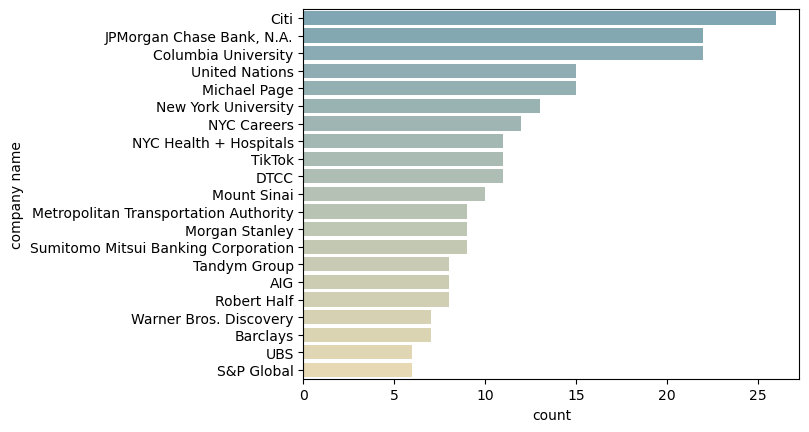

In [162]:
# Bar plot: top 20 companies hiring the most for data analytics roles in New York

datajobs_company = datajobs_company[:21]
sns.barplot(x='count', y='company name', palette='blend:#7AB,#EDA', data=datajobs_company)

## Remote data analytics positions in New York

In [149]:
# Postings of remote jobs

datajobs
datajobs_remote = datajobs[datajobs['location'].str.contains('remote', case=False)] 
datajobs_remote

,title,company name,description,location,date posted
2,Data Scientist - Hybrid Remote,Sharecare,Formulates efforts for guided multifaceted ana...,"Hybrid remote in New York, NY",Posted 9 days ago
5,Junior Data Analyst,Michael Page,1-2 years experience in data analytics.\nExper...,"Hybrid remote in New York, NY 10174",Posted 30+ days ago
9,Data Analyst III (Healthcare Analytics),Fidelis Care,"Apply expertise in quantitative analysis, data...","Hybrid remote in New York, NY\n+2 locations",Posted 3 days ago
12,Remote Junior Data Analyst,Utilisave,This is a business critical hands-on role and ...,"Remote in New York, NY 10001",Posted 30+ days ago
13,"Data Analyst, Datasets",Earnest Analytics,Create data libraries to structure billions of...,"Remote in New York, NY",Posted 30 days ago
...,...,...,...,...,...
1470,Business Analyst - (W2 candidate only),Vaco,Experience with building data ETL pipelines an...,"Remote in New York, NY",Posted 20 days ago
1485,Business Analyst (Remote),Tandym Group,A New Jersey-based professional services firm ...,"Remote in Montvale, NJ 07645",Posted 5 days ago
1490,Market Risk Associate,DTCC,Are you ready to explore a world of possibilit...,"Hybrid remote in Jersey City, NJ 07310",Posted 30+ days ago
1495,Data Scientist / Data Developer - REMOTE,Highlight Technologies,Overview: We are looking for a Data Scientist ...,Remote in United States,Posted 30+ days ago


In [176]:
# The number of remote positions each company is hiring for data analytics

datajobs_company_remote = pd.DataFrame(datajobs_remote['company name'].value_counts()).reset_index()
datajobs_company_remote = datajobs_company_remote.rename(columns={'index': 'company name', 'company name': 'count'})
datajobs_company_remote

,company name,count
0,New York University,12
1,DTCC,11
2,Barclays,6
3,Peraton,5
4,TikTok,5
...,...,...
219,The Washington Post,1
220,Dynata,1
221,WW International,1
222,"Recora, Inc",1


<AxesSubplot:xlabel='count', ylabel='company name'>

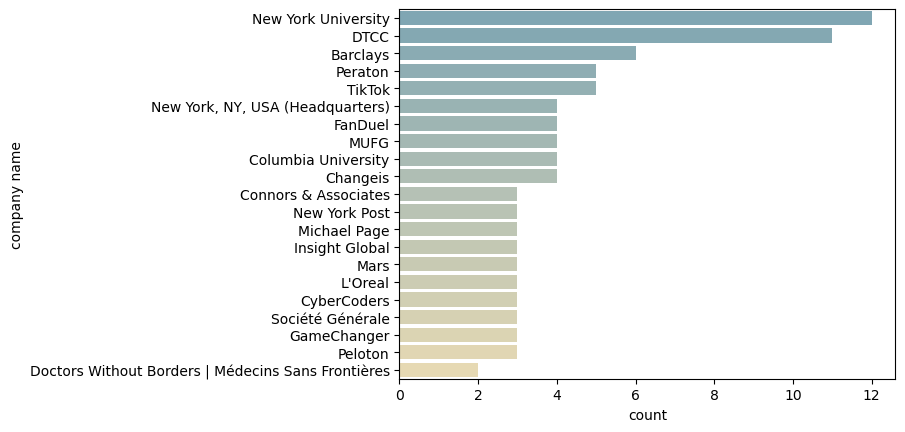

In [164]:
# Bar plot: top 20 companies hiring the most for remote data analytics roles in New York

datajobs_company_remote = datajobs_company_remote[:21]
sns.barplot(x='count', y='company name', palette='blend:#7AB,#EDA', data=datajobs_company_remote)

## Most popular job titles for data analytics in New York

In [169]:
# Count of each job title's appearance

datajobs_title = datajobs[datajobs['title']!= 'N/A']
datajobs_title = pd.DataFrame(datajobs_title['title'].value_counts()).reset_index()
datajobs_title = datajobs_title.rename(columns={'index': 'title', 'title': 'count'})
datajobs_title

,title,count
0,Business Analyst,34
1,Data Analyst,30
2,Financial Analyst,15
3,Data Scientist,13
4,Senior Data Analyst,12
...,...,...
956,Sales Associate,1
957,Data Analyst - Contractor only,1
958,Business Analyst - Planning & Allocation,1
959,Quantitative Research Analyst (Desk Quant) -Ne...,1


<AxesSubplot:xlabel='count', ylabel='title'>

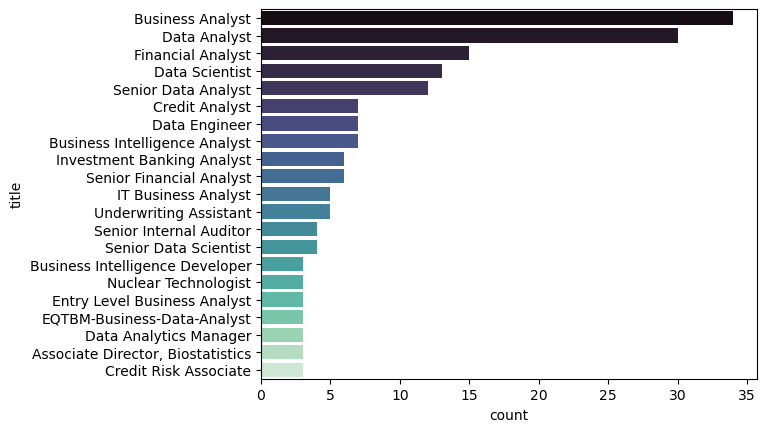

In [173]:
# Bar plot: top 20 most popular titles for data analytics roles in New York

datajobs_title = datajobs_title[:21]
sns.barplot(x='count', y='title', palette='mako', data=datajobs_title)

# Report

Write a report summarizing your findings. Your report should include tables and visualizations to support your conclusions, and should provide actionable insights that could be used by job seekers, employers, or policymakers.

## Companies hiring the most for data analytics positions in New York 
In this analysis, I explored the companies hiring the most for data analytics positions in New York. The data was collected from job postings and includes information on job titles, company names, job descriptions, locations, and date posted. By examining the dataset, I identified the top companies actively recruiting for data analytics roles in New York.

Top Companies Hiring for Remote Data Analytics Positions in New York

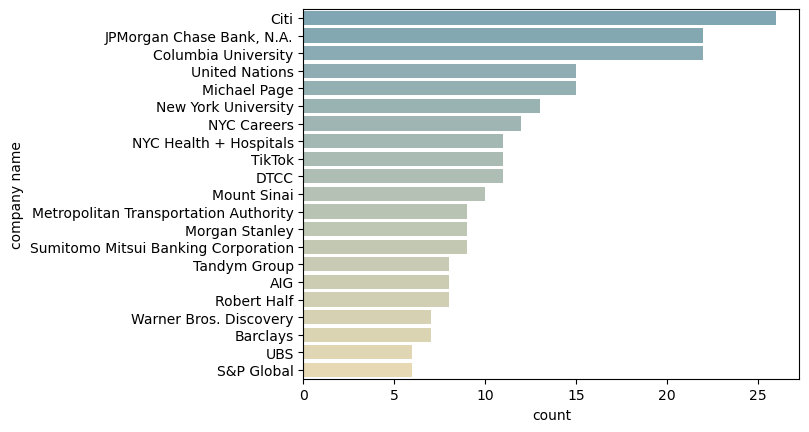

It is observed that the financial sector is highly active in hiring for data analytics positions, with companies like Citi Bank, JPMorgan Chase Bank, and Morgan Stanley leading the way. Additionally, universities and tech companies are also prominent employers in this field.

### Actionable Insights

**Job Seekers:** Candidates interested in data analytics positions in New York should focus their job search efforts on these top hiring companies. These companies offer a significant number of opportunities and may provide a diverse range of roles and career growth prospects.

**Employers:** Companies looking to hire data analytics professionals in New York can gain insights from the top hiring companies, and also identify competition in certain sectors like finance and tech. Acknoledging competition can help improve recruitment efforts and attract top talent.

**Policymakers:** The concentration of hiring in the financial sector suggests the importance of fostering a strong data analytics talent pipeline to support the growth of this industry in New York. Policymakers can consider initiatives such as promoting data analytics education and supporting collaborations between academia and industry to address the talent demand.


## Remote data analytics positions in New York
In addition to the companies hiring for data analytics positions in New York, I also analyzed the availability of remote positions in this field. Remote work has gained popularity due to the ongoing transition caused by Covid-19, offering flexibility and cost-saving benefits for both employees and employers.

Top Companies Hiring for Remote Data Analytics Positions in New York

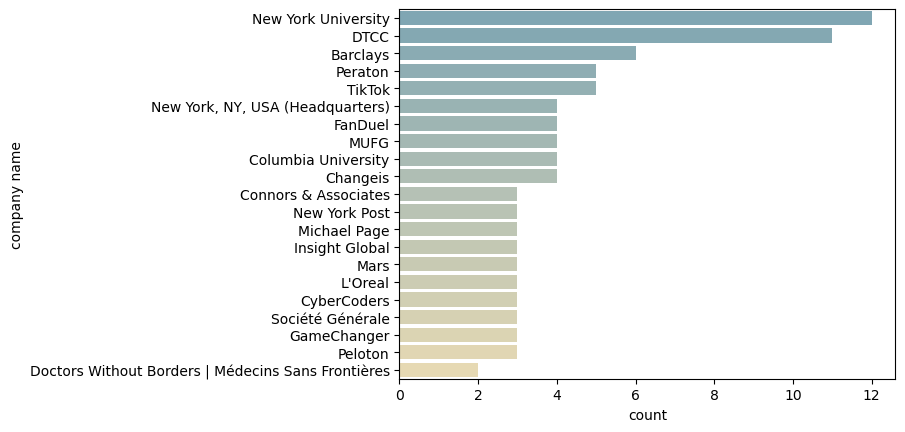

Among the companies offering remote data analytics positions, New York University stands out as the top employer. Out of their 13 job postings, 12 are for remote roles. This highlights the university's adoption of remote work arrangements in the data analytics field. Other prominent companies hiring for remote positions include financial institutions and tech companies.

Before exploring implications for job seekers and employers, it's worth mention the benefits of remote data analytics positions:

* Flexibility: Remote positions allow individuals to work from anywhere, providing flexibility in managing work-life balance and eliminating commuting time and expenses.

* Cost Savings: Employees can save on living expenses, particularly in the expensive New York City area, by working remotely. This can be an attractive proposition for job seekers and can contribute to a more cost-effective workforce for employers.

* Talent Pool Expansion: By offering remote positions, companies have the opportunity to tap into a broader talent pool beyond the local area. This opens up access to highly skilled professionals who may not be able to relocate but can contribute remotely.

### Actionable Insights

**Job Seekers:** While seeking remote data analytics positions in New York, job seeker should consider exploring opportunities at New York University and other companies that offer remote work arrangements. These positions can provide the flexibility and benefits of remote work while being based in the dynamic data analytics market of New York.

**Employers:** To attract top talent in the data analytics field, consider incorporating remote work options into job postings. This can broaden company's candidate pool and appeal to professionals seeking remote work opportunities.

**Policymakers:** Recognizing the growing demand for remote work, policymakers can support initiatives that promote remote work arrangements and provide resources for companies to effectively implement and manage remote teams. This can contribute to the growth and competitiveness of the data analytics sector in New York.

Overall, the availability of remote data analytics positions in New York presents new opportunities for job seekers, employers, and policymakers alike. By embracing remote work arrangements, companies can tap into a wider talent pool and professionals can enjoy the benefits of flexibility and cost savings.


## Most popular job titles for data analytics in New York
To further analyze the data analytics job market in New York, I examined the most popular job titles in this field. The findings shed light on the specific roles and responsibilities that are in high demand.

Top Job Titles for Data Analytics in New York

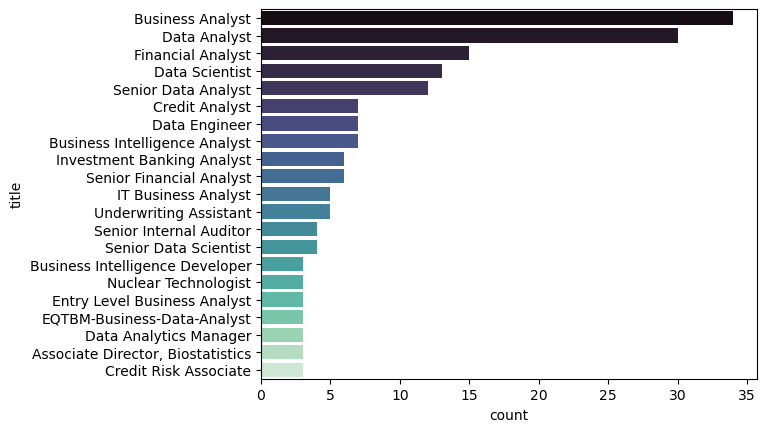

The most popular job title for data analytics positions in New York is Business Analyst. This aligns with our previous observation that financial institutions are among the most active hiring companies in this field. Business Analysts play a crucial role in analyzing business processes, identifying opportunities for improvement, and making data-driven decisions.

Following closely behind, the job title of Data Analyst is also highly sought after in the New York data analytics market. Data Analysts are responsible for collecting, analyzing, and interpreting data to provide insights that support business strategies and decision-making.

Reflecting the prominence of the finance sector in New York, Financial Analyst, Credit Analyst, and Business Intelligence Analyst are also among the most popular in data analytics. It is observed that 14 out of 20 most popular titles are positions dedicated specifically to finance sector

### Actionable Insights

**Job Seekers:** Job seekers interested in data analytics positions in New York should consider specializing or acquiring skills in the popular job titles mentioned above. These roles are highly sought after by employers in the finance and business sectors, offering opportunities for career growth and advancement.

**Employers:** To attract top talent in the data analytics field, focus on creating job postings that highlight the specific job titles in demand. Tailor the requirements and responsibilities to align with the popular job titles mentioned above to attract qualified candidates.

**Policymakers:** Recognizing the concentration of job opportunities in the finance and business sectors, policymakers can support initiatives that promote the development of skills in data analytics, finance, and business intelligence. This can help bridge the gap between the demand and supply of skilled professionals in these areas.

The popularity of job titles in data analytics provides valuable insights into the specific roles and industries driving the demand for these skills in New York. By aligning their skills and qualifications with these popular job titles, job seekers can increase their chances of securing relevant positions, while employers can tailor their recruitment strategies to attract the best talent.